In [22]:
import pandas as pd

df = pd.read_csv('Saber_11__2019-2.csv', na_values=['-'])

In [23]:
# Mirar valores nulos
print(df.isnull().sum())

ESTU_TIPODOCUMENTO              0
ESTU_NACIONALIDAD               0
ESTU_GENERO                   121
ESTU_FECHANACIMIENTO            0
PERIODO                         0
                            ...  
ESTU_INSE_INDIVIDUAL        17045
ESTU_NSE_INDIVIDUAL         17045
ESTU_NSE_ESTABLECIMIENTO       44
ESTU_ESTADOINVESTIGACION        0
ESTU_GENERACION-E               0
Length: 82, dtype: int64


In [24]:
# Dame la lista de nombres de variables que tienen valores nulos
print(df.columns[df.isnull().any()].tolist())

['ESTU_GENERO', 'ESTU_TIENEETNIA', 'ESTU_ETNIA', 'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE', 'ESTU_COD_RESIDE_MCPIO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR', 'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE', 'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS', 'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS', 'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE', 'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA', 'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA', 'ESTU_TIPOREMUNERACION', 'COLE_BILINGUE', 'COLE_CARACTER', 'PUNT_INGLES', 'PERCENTIL_GLOBAL', 'ESTU_INSE_INDIVIDUAL', 'ESTU_NSE_INDIVIDUAL', 'ESTU_NSE_ESTABLECIMIENTO']


In [25]:
# lista de variables categóricas y numéricas
categorical = df.select_dtypes(include=['object'])
numerical = df.select_dtypes(include=['int64', 'float64'])

# Mirar valores nulos
print('Variables categóricas con valores nulos ordenadas de mayor a menor')
# print(categorical.isnull().sum().sort_values(ascending=False))

# Imputar variables categóricas con la moda
categorical = categorical.fillna(categorical.mode().iloc[0])
print(categorical.isnull().sum().sort_values(ascending=False))

Variables categóricas con valores nulos ordenadas de mayor a menor
ESTU_TIPODOCUMENTO               0
FAMI_COMELECHEDERIVADOS          0
FAMI_COMECEREALFRUTOSLEGUMBRE    0
FAMI_SITUACIONECONOMICA          0
ESTU_DEDICACIONLECTURADIARIA     0
ESTU_DEDICACIONINTERNET          0
ESTU_HORASSEMANATRABAJA          0
ESTU_TIPOREMUNERACION            0
COLE_NOMBRE_ESTABLECIMIENTO      0
COLE_GENERO                      0
COLE_NATURALEZA                  0
COLE_CALENDARIO                  0
COLE_BILINGUE                    0
COLE_CARACTER                    0
COLE_NOMBRE_SEDE                 0
COLE_SEDE_PRINCIPAL              0
COLE_AREA_UBICACION              0
COLE_JORNADA                     0
COLE_MCPIO_UBICACION             0
COLE_DEPTO_UBICACION             0
ESTU_PRIVADO_LIBERTAD            0
ESTU_MCPIO_PRESENTACION          0
ESTU_DEPTO_PRESENTACION          0
DESEMP_INGLES                    0
ESTU_ESTADOINVESTIGACION         0
FAMI_COMECARNEPESCADOHUEVO       0
FAMI_NUMLIBROS         

In [26]:
# imputar variables numéricas usando la moda
numerical = numerical.fillna(numerical.mode().iloc[0])
print(numerical.isnull().sum().sort_values(ascending=False))

# actualizar el dataframe
df = pd.concat([categorical, numerical], axis=1)
print(df.isnull().sum().sort_values(ascending=False))

PERIODO                          0
DESEMP_MATEMATICAS               0
ESTU_NSE_INDIVIDUAL              0
ESTU_INSE_INDIVIDUAL             0
PERCENTIL_GLOBAL                 0
PUNT_GLOBAL                      0
PERCENTIL_INGLES                 0
PUNT_INGLES                      0
DESEMP_SOCIALES_CIUDADANAS       0
PERCENTIL_SOCIALES_CIUDADANAS    0
PUNT_SOCIALES_CIUDADANAS         0
DESEMP_C_NATURALES               0
PERCENTIL_C_NATURALES            0
PUNT_C_NATURALES                 0
PERCENTIL_MATEMATICAS            0
ESTU_COD_RESIDE_DEPTO            0
PUNT_MATEMATICAS                 0
DESEMP_LECTURA_CRITICA           0
PERCENTIL_LECTURA_CRITICA        0
PUNT_LECTURA_CRITICA             0
ESTU_COD_DEPTO_PRESENTACION      0
ESTU_COD_MCPIO_PRESENTACION      0
COLE_COD_DEPTO_UBICACION         0
COLE_COD_MCPIO_UBICACION         0
COLE_COD_DANE_SEDE               0
COLE_COD_DANE_ESTABLECIMIENTO    0
COLE_CODIGO_ICFES                0
ESTU_COD_RESIDE_MCPIO            0
ESTU_NSE_ESTABLECIMI

In [27]:
# Discretizar la variable PUNT_GLOBAL en 4 categorías usando equal width binning
# crear una nueva columna en el dataframe con la variable discretizada en 4 equal width
df['PUNT_GLOBAL_CAT'] = pd.cut(df['PUNT_GLOBAL'], bins=4, labels=['muy bajo', 'bajo', 'alto', 'muy alto'])

# Observar qué representa cada categoría
print(df['PUNT_GLOBAL_CAT'].value_counts())

PUNT_GLOBAL_CAT
alto        281111
bajo        255617
muy alto      9344
muy bajo       140
Name: count, dtype: int64


Intervalo 1
Limite inferior: 0
Limite superior: 167
Intervalo 2
Limite inferior: 167
Limite superior: 334
Intervalo 3
Limite inferior: 334
Limite superior: 500
PUNT_GLOBAL_CAT
medio    490153
alto      28435
bajo      27620
Name: count, dtype: int64


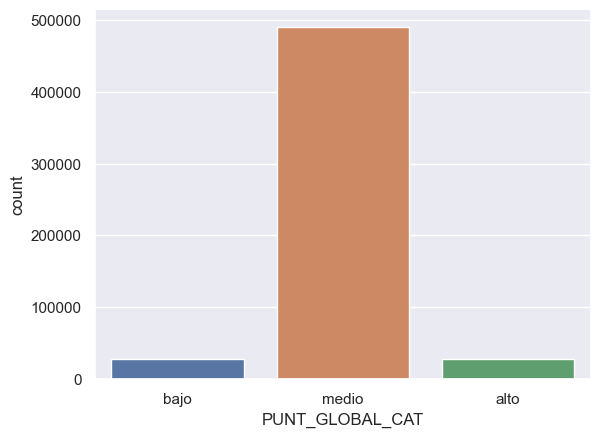

In [28]:
bins_intervalo=[0, 167, 334, 500]
labels_intervalo=['bajo', 'medio', 'muy alto']
for i in range(1, len(bins_intervalo)):
    print('Intervalo', i)
    print('Limite inferior:', bins_intervalo[i-1])
    print('Limite superior:', bins_intervalo[i])

# Discretizar la variable PUNT_GLOBAL en 4 categorías usando ancho de intervalo
# crear una nueva columna en el dataframe con la variable discretizada en 4 equal width
df['PUNT_GLOBAL_CAT'] = pd.cut(df['PUNT_GLOBAL'], bins=[0, 167, 334, 500], labels=[ 'bajo', 'medio', 'alto'])

# Observar qué representa cada categoría
print(df['PUNT_GLOBAL_CAT'].value_counts())

# graficar la variable discretizada
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="PUNT_GLOBAL_CAT", data=df)
plt.show()


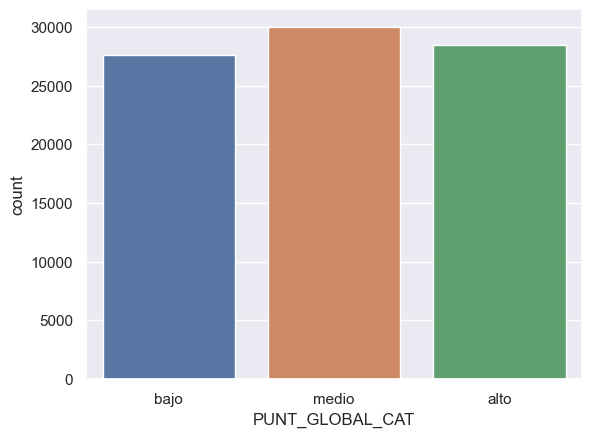

In [29]:
# función dejar 30k registros de la categoría 'medio
def dejar_30k_medio(df):
    df_medio = df[df['PUNT_GLOBAL_CAT'] == 'medio']
    df_medio = df_medio.sample(n=30000, random_state=1)
    df = df[df['PUNT_GLOBAL_CAT'] != 'medio']
    #adicionar los 30k registros de la categoría medio al dataframe
    df = pd.concat([df, df_medio])
    return df

# aplicar la función
df = dejar_30k_medio(df)

# graficar la variable discretizada
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="PUNT_GLOBAL_CAT", data=df)
plt.show()


In [35]:
# exportar el dataframe a un archivo csv
df.to_csv('Saber_11__2019-2_preprocessed_v2.csv', index=False)
# mirar datos faltantes y ordenar de mayor a menor

# eliminar instancias con datos faltantes
df = df.dropna()
# mirar datos faltantes y ordenar de mayor a menor
# print(df.isnull().sum().sort_values(ascending=False))